In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Introduction
The novel coronavirus pandemic, known as COVID-19, is an ongoing global pandemic caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). Since its first discovery in China in December of 2019, the virus has killed more than 540,000 globally and infected more than 11 million. As of July 2020, the United States alone had near 130,000 deaths and 2.8 million confirmed cases. In addition, the coronavirus has inflicted severe economic damages around the world.

Models predicting the spread of COVID-19 provide a range of possibilities of what the future might look like. For this project I will write a simple simulation to monitor the spread of COVID-19 in New York City. My simulation is based on the simplest SIR model - the Kermack-McKendrik Model. I will follow and modify the examples in chapters 11 - 13 of the Modeling and Simulation in Python textbook. My goal is to apply real world data to the techniques that I learned in class and interpret the results based on actual scenarios.


### Data collected for COVID-19 for New York City


Time between contact/incubation:    6 days

Time between recovery: 	            28 days

Beta - rate of infection:       	1/6

Gamma - rate of recovery:     		1/28
  
N - total population of NYC:		8,399,000 

I0 - initial # of infected: 		5464 cases at end of March

T - period of days:			        300 days (Since outbreak in March through end of 2020)


The model consists of three nonlinear differential equations:
 \begin{equation*}
\frac{d S}{dt} =
-\beta SI
\end{equation*}

 \begin{equation*}
\frac{d I}{dt} =
\beta SI - \gamma I
\end{equation*}

 \begin{equation*}
\frac{d R}{dt} =
\gamma I
\end{equation*}


t - time

S(t) - number of susceptible poeple

I(t) - number infected

R(t) - number of people who have recovered / developed immunity
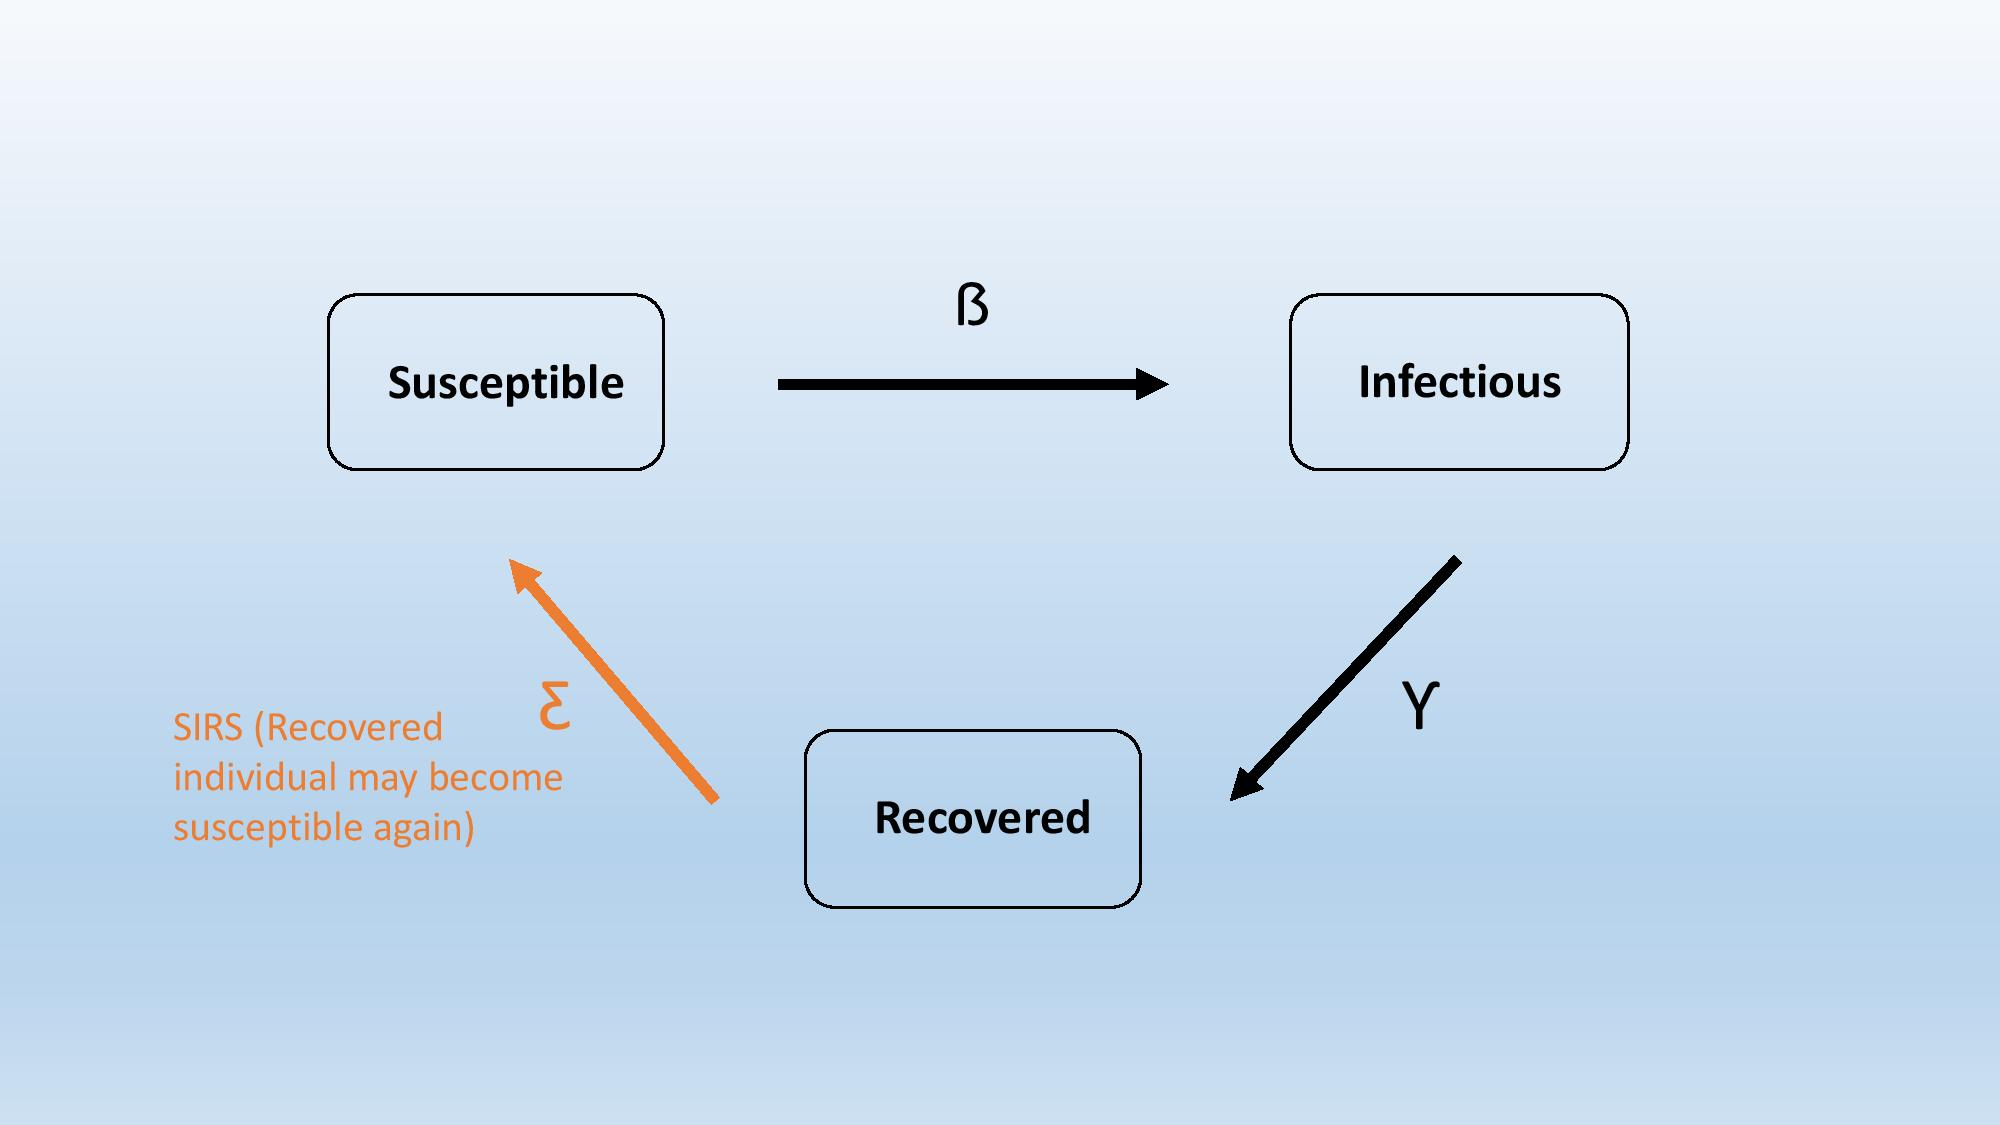

### Methods

In [2]:
# Part 1
# initialize the number of people in each categrory

init = State(S = 8399000, I = 5464, R = 0)
init /=sum(init)                           # convert to fractions

,values
S,0.99935
I,0.00065
R,0.00000


In [3]:
# make system object

def make_system(beta, gamma):
    init = State(S = 8399000, I = 5464, R = 0)
    init /= sum(init)
    t0 = 0
    t_end = 43 * 7
    return System(init = init, t0 = t0, t_end = t_end, beta = beta, gamma = gamma)

In [4]:
# compute parameters 

TimeContact = 6
TimeRecovery = 28
beta = 1 / TimeContact
gamma = 1 / TimeRecovery

system = make_system(beta, gamma)

,values
init,S 0.99935 I 0.00065 R 0.00000 dtype: ...
t0,0
t_end,301
beta,0.166667
gamma,0.0357143


In [5]:
# compute infected and recovered

def update_func(state, t, system):
    s, i, r = state                   # assign local variables
    
    infected =  system.beta * i * s
    recovered = system.gamma * i
    
    s -= infected
    i += infected - recovered
    r += recovered
    
    return State(S = s, I = i, R = r) # returns state object that contains the updated variables

In [6]:
state= update_func(init, 0, system)

,values
S,0.999242
I,0.000735
R,0.000023


In [7]:
# simulate the model

def run_simulation(system, update_func):
    state = system.init
    
    for t in linrange(system.t0, system.t_end):
        state = update_func(state, t, system)
    return state

run_simulation(system, update_func)

,values
S,0.008701
I,0.000238
R,0.991062


In [8]:
# make function to see state changes over time

def run_simulation(system, update_func):
    S = TimeSeries()
    I = TimeSeries()
    R = TimeSeries()
    
    state = system.init
    t0 = system.t0
    S[t0], I[t0], R[t0] = state
    
    for t in linrange(system.t0, system.t_end):
        state = update_func(state, t, system)
        S[t+1], I[t+1], R[t+1] = state
    return S, I, R

In [9]:
# run the function

system = make_system(beta, gamma)
S, I, R = run_simulation(system, update_func)

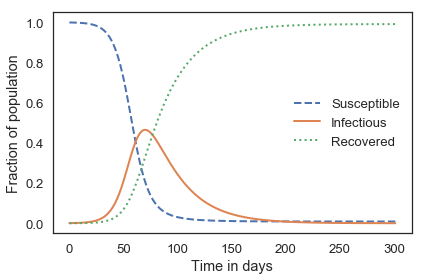

In [10]:
# plot the results

plot(S, '--', label = 'Susceptible')
plot(I, '-', label = 'Infectious')
plot(R, ':', label = 'Recovered')
decorate(xlabel='Time in days', ylabel = 'Fraction of population')

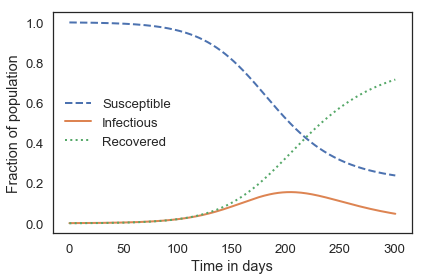

In [14]:
# Part 2
# simulate if quarentine measures are enforeced
# quarentine can be measured as a reduction in the contact rate beta. If days between contact is increased from the 
# average days for the symptom to appear to 14 days, value of beta will be smaller.

TimeContact = 14
TimeRecovery = 28
beta = 1 / TimeContact
gamma = 1 / TimeRecovery

system = make_system(beta, gamma)
system = make_system(beta, gamma)
S, I, R = run_simulation(system, update_func)
plot(S, '--', label = 'Susceptible')
plot(I, '-', label = 'Infectious')
plot(R, ':', label = 'Recovered')
decorate(xlabel='Time in days', ylabel = 'Fraction of population')

### Verification and validation
The SIR model is the fundamental and widely used method in predicting the spread of infection in a population. The properties of the model is well understood and traditional view of validating these models have relied on available clinial data. However, the SIR model can be modified to include additional parameters to better address the nature of a particular outbreak, thus verifying and validating the more complext models become more challenging. Metamorphic testing, a procedure in which the more complex model is reduced to simpler models by controlling a certain parametes to observe the properties of the system, is one of the methods for validation and verification.

### Conclusions
Part 1 of my simulation shows that if no quarentine measures are implemented, nearly half of the population becomes infectious in the second months of the outbreak. Part 2 added quarentine by increasing days between contact (reducing beta), the model predicts not only a more gradual increase of the infectious, but the fraction of the infectious population is half of that without quarentine measures.

### References

1. Allen B. Downey. 2017. Modeling and Simulation in Python. Version 3.4.3. Green Tea Press. 9 Washburn Ave, Needham, MA 02492.

2. Arvind Ramanathan, Chad A. Steed, and Laura L. Pullum. 2012. Verification of compartmental epidemiological models using metamorphic testing, model checking and visual analytics. In Proceedings of the 2012 ASE/IEEE International Conference on BioMedical Computing (BioMedCom ’12). IEEE Computer Society, Los Alamitos, CA, 68–73.

3. Giordano, G., Blanchini, F., Bruno, R. et al. Modelling the COVID-19 epidemic and implementation of population-wide interventions in Italy. Nat Med 26, 855–860 (2020). https://doi.org/10.1038/s41591-020-0883-7
4. https://gabgoh.github.io/COVID/
5. https://mathworld.wolfram.com/Kermack-McKendrickModel.html
6. https://coronavirus.jhu.edu/

Source Code
- Allen B. Downey - 2017 - Modeling and Simulation in Python. Version 3.4.3. Chapters 11-14 - Python - https://github.com/AllenDowney/ModSimPy

